In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, pandas as pd
from pylift import TransformedOutcome

In [2]:
pd.options.display.max_rows = 12

In [8]:
cols = ['treat', 'age', 'educ', 'black', 'hisp', 'married', 'nodegr', 're74', 're75', 're78']

# read in lalonde data from online
control_df = pd.read_csv('http://www.nber.org/~rdehejia/data/nswre74_control.txt', sep='\s+', header = None, names = cols)
treated_df = pd.read_csv('http://www.nber.org/~rdehejia/data/nswre74_treated.txt', sep='\s+', header = None, names = cols)

lalonde_df = pd.concat([control_df, treated_df], ignore_index = True)
lalonde_df['u74'] = np.where(lalonde_df['re74']==0, 1.0, 0.0)
lalonde_df['u75'] = np.where(lalonde_df['re75']==0, 1.0, 0.0)

In [9]:
lalonde_df.head()

,treat,age,educ,black,hisp,married,nodegr,re74,re75,re78,u74,u75
0,0.0,23.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0,1.0
1,0.0,26.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,12383.68,1.0,1.0
2,0.0,22.0,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0,1.0
3,0.0,18.0,9.0,1.0,0.0,0.0,1.0,0.0,0.0,10740.08,1.0,1.0
4,0.0,45.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,11796.47,1.0,1.0


# Prepare input DF for pylift`

In [10]:
df = lalonde_df[['nodegr', 'black', 'hisp', 'age', 'educ', 'married', 'u74', 'u75','treat', 're78']].copy()
df.rename(columns = {'treat':'Treatment', 're78':'Outcome'}, inplace = True)

df['Outcome'] = np.where(df['Outcome'] > 0, 1.0, 0.0)

In [11]:
df

,nodegr,black,hisp,age,educ,married,u74,u75,Treatment,Outcome
0,1.0,1.0,0.0,23.0,10.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,26.0,12.0,0.0,1.0,1.0,0.0,1.0
2,1.0,1.0,0.0,22.0,9.0,0.0,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,18.0,9.0,0.0,1.0,1.0,0.0,1.0
4,1.0,1.0,0.0,45.0,11.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
440,0.0,1.0,0.0,33.0,12.0,1.0,0.0,0.0,1.0,1.0
441,0.0,1.0,0.0,25.0,14.0,1.0,0.0,0.0,1.0,1.0
442,1.0,1.0,0.0,35.0,9.0,1.0,0.0,0.0,1.0,1.0
443,1.0,1.0,0.0,35.0,8.0,1.0,0.0,0.0,1.0,1.0


In [12]:
pd.crosstab(df['Outcome'] , df['Treatment'], margins = True)

Treatment,0.0,1.0,All
Outcome,,,
0.0,92,45,137
1.0,168,140,308
All,260,185,445


In [13]:
pd.crosstab(df['Outcome'], df['Treatment'], margins = True, normalize = True)

Treatment,0.0,1.0,All
Outcome,,,
0.0,0.206742,0.101124,0.307865
1.0,0.377528,0.314607,0.692135
All,0.584270,0.415730,1.000000


In [14]:
df.corr()

,nodegr,black,hisp,age,educ,married,u74,u75,Treatment,Outcome
nodegr,1.000000,0.041948,0.086638,-0.112838,-0.635575,-0.038554,0.049934,0.079798,-0.151012,-0.045548
black,0.041948,1.000000,-0.693969,0.087171,0.045405,0.023731,0.030152,0.038685,0.021602,-0.167117
hisp,0.086638,-0.693969,1.000000,-0.090157,-0.144835,0.009064,-0.046158,0.011191,-0.084066,0.120627
age,-0.112838,0.087171,-0.090157,1.000000,0.022964,0.210072,0.102457,0.075597,0.052977,-0.010435
educ,-0.635575,0.045405,-0.144835,0.022964,1.000000,0.081613,-0.092843,-0.127603,0.070890,0.004852
married,-0.038554,0.023731,0.009064,0.210072,0.081613,1.000000,-0.080614,-0.096973,0.046531,0.027178
u74,0.049934,0.030152,-0.046158,0.102457,-0.092843,-0.080614,1.000000,0.726574,-0.046647,-0.061988
u75,0.079798,0.038685,0.011191,0.075597,-0.127603,-0.096973,0.726574,1.000000,-0.087400,-0.061491
Treatment,-0.151012,0.021602,-0.084066,0.052977,0.070890,0.046531,-0.046647,-0.087400,1.000000,0.118087
Outcome,-0.045548,-0.167117,0.120627,-0.010435,0.004852,0.027178,-0.061988,-0.061491,0.118087,1.000000


# Apply pylift

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Seed 0 finished.
Seed 1 finished.
Seed 2 finished.
Seed 3 finished.


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Seed 4 finished.


<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

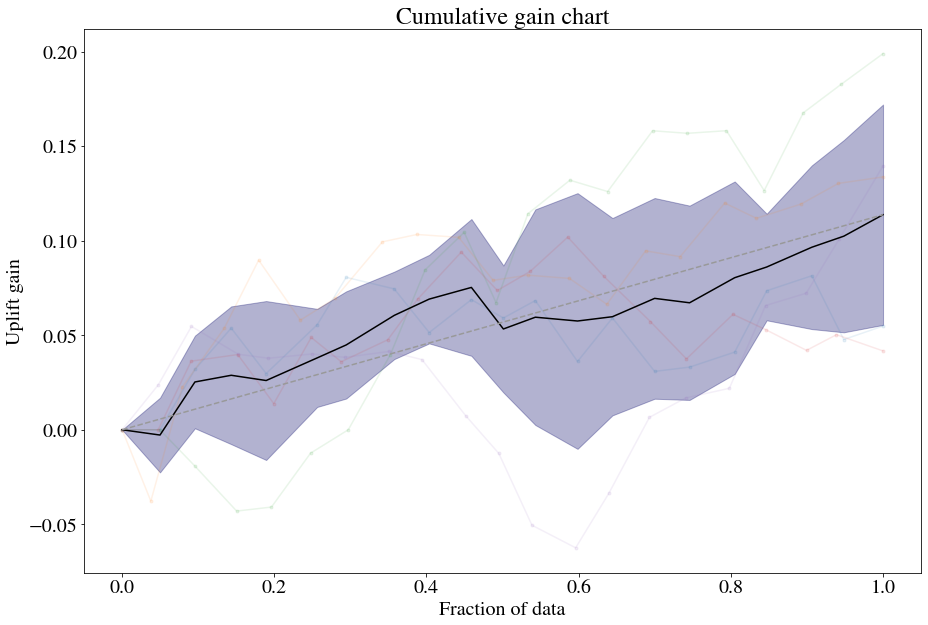

In [16]:
up = TransformedOutcome(df, col_treatment = 'Treatment', col_outcome = 'Outcome', stratify = df['Treatment'])
up.randomized_search(n_iter = 20, n_jobs = 10, random_state = 1)
up.shuffle_fit(params = up.rand_search_.best_params_, nthread = 30, iterations = 5)
up.plot(show_shuffle_fits = True)

In [18]:
up.fit(**up.rand_search_.best_params_)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Treatment balance curve'}, xlabel='Fraction of data', ylabel='Treatment size / (treatment size + control size)'>

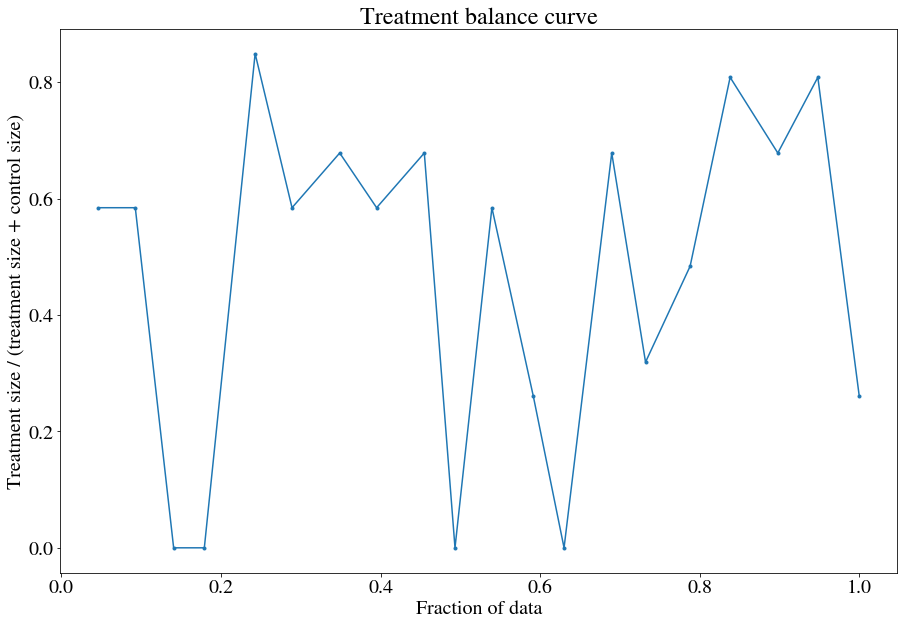

In [19]:
up.plot(plot_type = 'balance')